## COVID-19 vaccination rate vs. new cases rate

### Data sources

CovidLive AU: https://covidlive.com.au/



In [2]:
import pandas as pd

In [3]:
## COVID live
## NB: Google datasets do not include vaccination doses for the 16+ age groups
df_covid_live = pd.read_json('https://covidlive.com.au/covid-live.json')

In [4]:
df_covid_live

,REPORT_DATE,LAST_UPDATED_DATE,CODE,NAME,CASE_CNT,TEST_CNT,DEATH_CNT,RECOV_CNT,MED_ICU_CNT,MED_VENT_CNT,MED_HOSP_CNT,SRC_OVERSEAS_CNT,SRC_INTERSTATE_CNT,SRC_CONTACT_CNT,SRC_UNKNOWN_CNT,SRC_INVES_CNT,PREV_CASE_CNT,PREV_TEST_CNT,PREV_DEATH_CNT,PREV_RECOV_CNT,PREV_MED_ICU_CNT,PREV_MED_VENT_CNT,PREV_MED_HOSP_CNT,PREV_SRC_OVERSEAS_CNT,PREV_SRC_INTERSTATE_CNT,PREV_SRC_CONTACT_CNT,PREV_SRC_UNKNOWN_CNT,PREV_SRC_INVES_CNT,PROB_CASE_CNT,PREV_PROB_CASE_CNT,ACTIVE_CNT,PREV_ACTIVE_CNT,NEW_CASE_CNT,PREV_NEW_CASE_CNT,VACC_DIST_CNT,PREV_VACC_DIST_CNT,VACC_DOSE_CNT,PREV_VACC_DOSE_CNT,VACC_PEOPLE_CNT,PREV_VACC_PEOPLE_CNT,VACC_AGED_CARE_CNT,PREV_VACC_AGED_CARE_CNT,VACC_GP_CNT,PREV_VACC_GP_CNT,VACC_FIRST_DOSE_CNT,PREV_VACC_FIRST_DOSE_CNT,VACC_FIRST_DOSE_CNT_12_15,PREV_VACC_FIRST_DOSE_CNT_12_15,VACC_PEOPLE_CNT_12_15,PREV_VACC_PEOPLE_CNT_12_15
0,2021-10-10,2021-10-10 18:00:05,AUS,Australia,127472,39758066.0,1432,41671.0,293.0,169.0,1449.0,8447.0,229.0,57658.0,6011.0,53237.0,125082.0,39580942.0,1421.0,41646.0,287.0,163.0,1437.0,8443.0,226.0,57270.0,6011.0,53132.0,0.0,0.0,25771.0,24985.0,2402.0,NaN,NaN,NaN,30540757.0,30304350.0,12883681.0,12720856.0,1027744.0,1022051.0,16740097.0,16610709.0,17593798.0,17521126.0,640201,627141,113040,96331
1,2021-10-10,2021-10-10 11:15:03,NSW,NSW,68712,18060080.0,485,3445.0,159.0,76.0,794.0,3662.0,109.0,23749.0,1918.0,39274.0,68246.0,17973925.0,479.0,3445.0,163.0,75.0,812.0,3661.0,107.0,23391.0,1918.0,39169.0,NaN,NaN,6938.0,7296.0,479.0,581.0,NaN,NaN,11012744.0,10937104.0,4890800.0,4831173.0,491124.0,489674.0,6750423.0,6696708.0,6196332.0,6179093.0,265298,260972,63164,54520
2,2021-10-10,2021-10-10 16:45:03,VIC,Victoria,52902,11816694.0,905,NaN,126.0,88.0,609.0,1224.0,0.0,31973.0,3871.0,13944.0,51012.0,11742589.0,900.0,32913.0,117.0,83.0,578.0,1224.0,0.0,31973.0,3871.0,13944.0,NaN,NaN,18342.0,17199.0,NaN,1965.0,NaN,NaN,8118413.0,8037439.0,3192556.0,3136657.0,188539.0,187599.0,4090650.0,4049159.0,4821632.0,4798757.0,196399,192180,22582,18232
3,2021-10-10,2021-10-10 11:41:03,QLD,Queensland,2062,4498192.0,7,2014.0,1.0,0.0,19.0,1504.0,32.0,479.0,47.0,0.0,2059.0,4491113.0,7.0,2014.0,0.0,0.0,21.0,1501.0,32.0,479.0,47.0,0.0,NaN,NaN,34.0,34.0,2.0,NaN,NaN,NaN,5226727.0,5190161.0,2164039.0,2141292.0,189416.0,187080.0,2914748.0,2899132.0,2966588.0,2953541.0,88473,86711,15054,13066
4,2021-10-10,2021-10-10 18:00:05,WA,WA,1110,1795070.0,9,1086.0,2.0,0.0,4.0,994.0,9.0,93.0,14.0,0.0,1110.0,1795070.0,9.0,1086.0,2.0,0.0,4.0,994.0,9.0,93.0,14.0,0.0,NaN,NaN,15.0,15.0,NaN,NaN,NaN,NaN,2638818.0,2619175.0,1096708.0,1087062.0,65445.0,64878.0,1294428.0,1285473.0,1513553.0,1503832.0,35577,34218,3351,2822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,2020-01-25,None,WA,WA,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5621,2020-01-25,None,SA,SA,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5622,2020-01-25,None,TAS,Tasmania,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
5623,2020-01-25,None,ACT,ACT,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [5]:
## Source: https://www.health.gov.au/sites/default/files/documents/2021/10/covid-19-vaccine-rollout-update-9-october-2021.pdf
pop_16plus = {
    'VIC': 5407574,
    'NSW': 6565651
}

In [6]:
df_covid_live['REPORT_DATE_dt'] = pd.to_datetime(df_covid_live['REPORT_DATE'])
df_covid_live['pop_16plus'] = df_covid_live['CODE'].map(pop_16plus)
df_covid_live['first_dose_rate'] = (df_covid_live['VACC_FIRST_DOSE_CNT'] - df_covid_live['VACC_FIRST_DOSE_CNT_12_15']) / df_covid_live['pop_16plus'] * 100.0
df_covid_live['second_dose_rate'] = (df_covid_live['VACC_PEOPLE_CNT'] - df_covid_live['VACC_PEOPLE_CNT_12_15']) / df_covid_live['pop_16plus'] * 100.0
df_covid_live['new_hospitalisations'] = df_covid_live['MED_HOSP_CNT'] - df_covid_live['PREV_MED_HOSP_CNT']
df_covid_live[df_covid_live['CODE'] == 'NSW'].sort_values('REPORT_DATE')

,REPORT_DATE,LAST_UPDATED_DATE,CODE,NAME,CASE_CNT,TEST_CNT,DEATH_CNT,RECOV_CNT,MED_ICU_CNT,MED_VENT_CNT,MED_HOSP_CNT,SRC_OVERSEAS_CNT,SRC_INTERSTATE_CNT,SRC_CONTACT_CNT,SRC_UNKNOWN_CNT,SRC_INVES_CNT,PREV_CASE_CNT,PREV_TEST_CNT,PREV_DEATH_CNT,PREV_RECOV_CNT,PREV_MED_ICU_CNT,PREV_MED_VENT_CNT,PREV_MED_HOSP_CNT,PREV_SRC_OVERSEAS_CNT,PREV_SRC_INTERSTATE_CNT,PREV_SRC_CONTACT_CNT,PREV_SRC_UNKNOWN_CNT,PREV_SRC_INVES_CNT,PROB_CASE_CNT,PREV_PROB_CASE_CNT,ACTIVE_CNT,PREV_ACTIVE_CNT,NEW_CASE_CNT,PREV_NEW_CASE_CNT,VACC_DIST_CNT,PREV_VACC_DIST_CNT,VACC_DOSE_CNT,PREV_VACC_DOSE_CNT,VACC_PEOPLE_CNT,PREV_VACC_PEOPLE_CNT,VACC_AGED_CARE_CNT,PREV_VACC_AGED_CARE_CNT,VACC_GP_CNT,PREV_VACC_GP_CNT,VACC_FIRST_DOSE_CNT,PREV_VACC_FIRST_DOSE_CNT,VACC_FIRST_DOSE_CNT_12_15,PREV_VACC_FIRST_DOSE_CNT_12_15,VACC_PEOPLE_CNT_12_15,PREV_VACC_PEOPLE_CNT_12_15,REPORT_DATE_dt,pop_16plus,first_dose_rate,second_dose_rate,new_hospitalisations
5617,2020-01-25,None,NSW,NSW,3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2020-01-25,6565651.0,NaN,NaN,NaN
5608,2020-01-26,None,NSW,NSW,3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2020-01-26,6565651.0,NaN,NaN,NaN
5599,2020-01-27,None,NSW,NSW,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2020-01-27,6565651.0,NaN,NaN,NaN
5590,2020-01-28,None,NSW,NSW,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2020-01-28,6565651.0,NaN,NaN,NaN
5581,2020-01-29,None,NSW,NSW,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,2020-01-29,6565651.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2021-10-06,2021-10-06 11:15:03,NSW,NSW,66456,17678457.0,449,3445.0,188.0,93.0,959.0,3658.0,108.0,22568.0,1551.0,38571.0,65876.0,17587777.0,439.0,3445.0,190.0,94.0,978.0,3659.0,107.0,22215.0,1551.0,38344.0,NaN,NaN,8211.0,8571.0,594.0,608.0,NaN,NaN,10579684.0,10439459.0,4567214.0,4465060.0,479923.0,473966.0,6423593.0,6321870.0,6082741.0,6044007.0,238634,228932,29196,22135,2021-10-06,6565651.0,89.010321,69.117564,-19.0
28,2021-10-07,2021-10-07 11:15:02,NSW,NSW,67024,17790643.0,457,3445.0,181.0,85.0,911.0,3658.0,107.0,22952.0,1830.0,38477.0,66456.0,17678457.0,449.0,3445.0,188.0,93.0,959.0,3658.0,108.0,22568.0,1551.0,38571.0,NaN,NaN,7868.0,8211.0,587.0,594.0,NaN,NaN,10699666.0,10579684.0,4653723.0,4567214.0,483500.0,479923.0,6514687.0,6423593.0,6117475.0,6082741.0,246901,238634,36775,29196,2021-10-07,6565651.0,89.413434,70.319729,-48.0
19,2021-10-08,2021-10-08 11:15:03,NSW,NSW,67669,17894031.0,468,3445.0,170.0,75.0,856.0,3660.0,107.0,23108.0,1918.0,38876.0,67024.0,17790643.0,457.0,3445.0,181.0,85.0,911.0,3658.0,107.0,22952.0,1830.0,38477.0,NaN,NaN,7604.0,7868.0,648.0,587.0,NaN,NaN,10815590.0,10699666.0,4738793.0,4653723.0,484504.0,483500.0,6605951.0,6514687.0,6149259.0,6117475.0,254277,246901,45270,36775,2021-10-08,6565651.0,89.785187,71.486026,-55.0
10,2021-10-09,2021-10-09 11:35:07,NSW,NSW,68246,17973925.0,479,3445.0,163.0,75.0,812.0,3661.0,107.0,23391.0,1918.0,39169.0,67669.0,17894031.0,468.0,3445.0,170.0,75.0,856.0,3660.0,107.0,23108.0,1918.0,38876.0,NaN,NaN,7296.0,7604.0,581.0,648.0,NaN,NaN,10937104.0,10815590.0,4831173.0,4738793.0,489674.0,484504.0,6696708.0,6605951.0,6179093.0,6149259.0,260972,254277,54520,45270,2021-10-09,6565651.0,90.137612,72.752161,-44.0


In [7]:
df_vacc_rates = df_covid_live[df_covid_live['CODE'].isin({'VIC', 'NSW'})][['REPORT_DATE_dt', 'CODE', 'NEW_CASE_CNT', 'first_dose_rate', 'second_dose_rate', 'MED_HOSP_CNT', 'new_hospitalisations']].sort_values('REPORT_DATE_dt')

df_vacc_rates

,REPORT_DATE_dt,CODE,NEW_CASE_CNT,first_dose_rate,second_dose_rate,MED_HOSP_CNT,new_hospitalisations
5618,2020-01-25,VIC,NaN,NaN,NaN,NaN,NaN
5617,2020-01-25,NSW,NaN,NaN,NaN,NaN,NaN
5608,2020-01-26,NSW,NaN,NaN,NaN,NaN,NaN
5609,2020-01-26,VIC,NaN,NaN,NaN,NaN,NaN
5599,2020-01-27,NSW,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19,2021-10-08,NSW,648.0,89.785187,71.486026,856.0,-55.0
11,2021-10-09,VIC,1965.0,85.187498,57.667727,578.0,-42.0
10,2021-10-09,NSW,581.0,90.137612,72.752161,812.0,-44.0
2,2021-10-10,VIC,NaN,85.532496,58.621001,609.0,31.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
## New cases by date and vaccination rate
data_2021_outbreaks = df_vacc_rates[df_vacc_rates['REPORT_DATE_dt'] >= '2021-08-01']

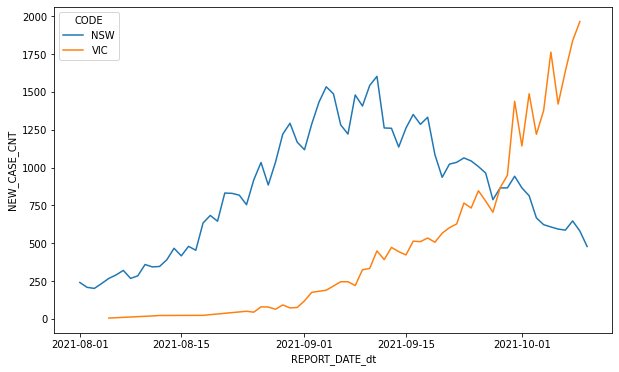

In [10]:

fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='REPORT_DATE_dt', y='NEW_CASE_CNT', hue='CODE')

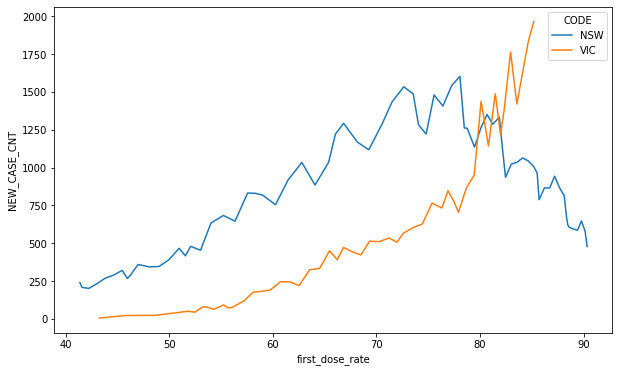

In [11]:
fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='first_dose_rate', y='NEW_CASE_CNT', hue='CODE')

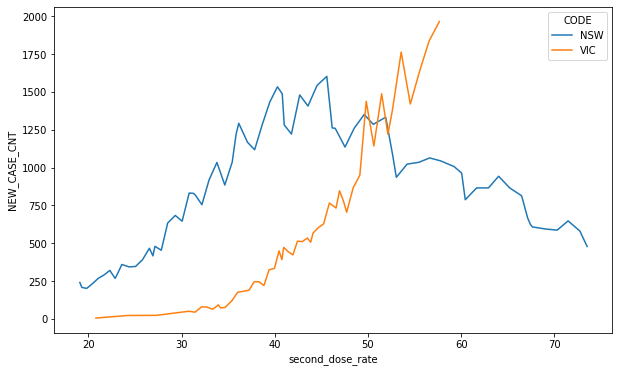

In [12]:
fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='second_dose_rate', y='NEW_CASE_CNT', hue='CODE')

In [13]:
## Hospitalisations by date and vaccination rate

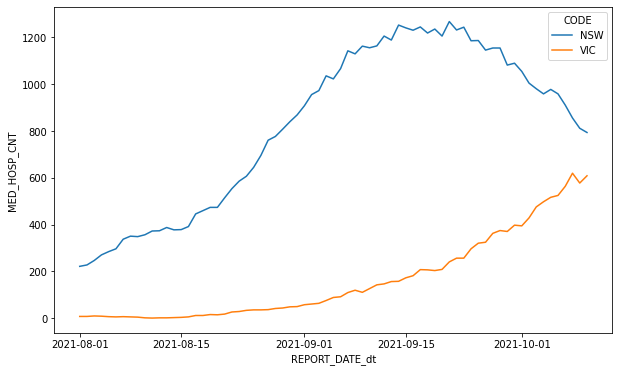

In [14]:
fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='REPORT_DATE_dt', y='MED_HOSP_CNT', hue='CODE')

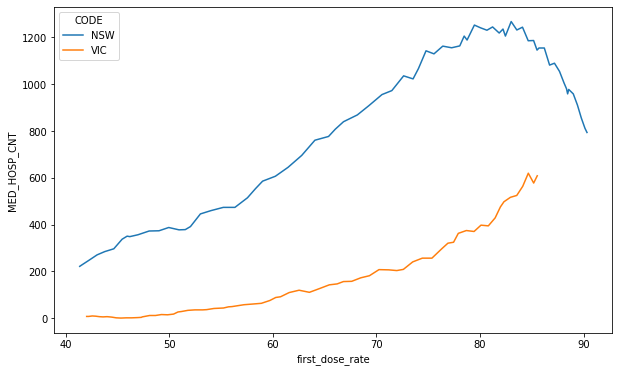

In [15]:
fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='first_dose_rate', y='MED_HOSP_CNT', hue='CODE')

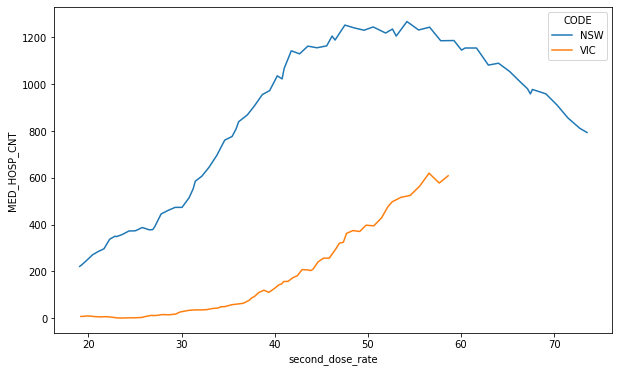

In [16]:
fig, _ = plt.subplots(figsize=(10,6))
sns.lineplot(data=data_2021_outbreaks, x='second_dose_rate', y='MED_HOSP_CNT', hue='CODE')

In [17]:
df_vacc_rates.to_csv('df_vacc_rates.csv', index=False)